<div style="font-family:Georgia; background-color:aliceblue; padding:30px; font-size:17px">
    <strong>🗺️ About DataSet</strong> 
    <br>
    Price quote data and item indices that underpin consumer price inflation statistics are now published, giving users unprecedented access to the detailed data that are used in the construction of the UK's inflation figures. With effect from the January 2017 consumer price inflation publication, these data are published on a monthly basis showing the latest month.
 
   <br>
</div>

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">
    <strong>🗺️ Content</strong> 
    <br>
This Dataset contains information of various products with number of rows = 139419 and 20 columns
 
   <br>
   <br>
   <strong>🗺️ Structure </strong>
   <br>
Product Price Dataset - 2023<br>
├── QUOTE_DATE<br>
├── ITEM_DESC<br>
├── VALIDITY<br>
├── SHOP_CODE<br>
├── PRICE<br>
├── INDICATOR_BOX<br>
├── ORIG_INDICATOR_BOX<br>
├── PRICE_RELATIVE<br>
├── LOG_PRICE_RELATIVE<br>
├── STRATUM_WEIGHT<br>
├── STRATUM_TYPE<br>
├── START_DATE<br>
├── END_DATE<br>
├── REGION<br>
├── SHOP_TYPE<br>
├── SHOP_WEIGHT<br>
├── BASE_PRICE<br>
├── BASE_VALIDITY<br>
├── STRATUM_CELL<br>
    <br>
</div>

<a id="2"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#0f0201;overflow:hidden"><b>Import libraries</b></div>

In [2]:
import pandas as pd
from pandas.io.formats.style import Styler
import numpy as np

from pandas_profiling import ProfileReport

from wordcloud import WordCloud

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
grn = Style.BRIGHT + Fore.GREEN
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

ModuleNotFoundError: No module named 'numpy.testing'

<a id="3"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#0f0201;overflow:hidden"><b>Read dataset</b></div>

In [ ]:
data = pd.read_csv('/kaggle/input/price-quote-data/upload-pricequotes202301.csv')
data.drop('QUOTE_DATE',axis=1,inplace=True)

In [ ]:
 def magnify(is_test: bool = False):
        base_color = '#0f0201'
        if is_test:
            highlight_target_row = []
        else:
            highlight_target_row = [dict(selector='tr:last-child',
                                         props=[('background-color', f'{base_color}'+'20')])]
            
        return [dict(selector="th",
                     props=[("font-size", "11pt"),
                            ('background-color', f'{base_color}'),
                            ('color', 'white'),
                            ('font-weight', 'bold'),
                            ('border-bottom', '0.1px solid white'),
                            ('border-left', '0.1px solid white'),
                            ('text-align', 'right')]),

                dict(selector='th.blank.level0', 
                    props=[('font-weight', 'bold'),
                           ('border-left', '1.7px solid white'),
                           ('background-color', 'white')]),

                dict(selector="td",
                     props=[('padding', "0.5em 1em"),
                            ('text-align', 'right')]),

                dict(selector="th:hover",
                     props=[("font-size", "14pt")]),

                dict(selector="tr:hover td:hover",
                     props=[('max-width', '250px'),
                            ('font-size', '14pt'),
                            ('color', f'{base_color}'),
                            ('font-weight', 'bold'),
                            ('background-color', 'white'),
                            ('border', f'1px dashed {base_color}')]),
                
                 dict(selector="caption",
                      props=[(('caption-side', 'bottom'))])] + highlight_target_row

def stylize_min_max_count(pivot_table):
    """Waps the min_max_count pivot_table into the Styler.

        Args:
            df: |min_train| max_train |min_test |max_test |top10_counts_train |top_10_counts_train|

        Returns:
            s: the dataframe wrapped into Styler.
    """
    s = pivot_table
    # A formatting dictionary for controlling each column precision (.000 <-). 
    di_frmt = {(i if i.startswith('m') else i):
              ('{:.3f}' if i.startswith('m') else '{:}') for i in s.columns}

    s = s.style.set_table_styles(magnify(True))\
        .format(di_frmt)\
        .set_caption(f"The train and test datasets min, max, top10 values side by side (hover to magnify).")
    return s
  
    
def stylize_describe(df: pd.DataFrame, dataset_name: str = 'train', is_test: bool = False) -> Styler:
    """Applies .descibe() method to the df and wraps it into the Styler.
    
        Args:
            df: any dataframe (train/test/origin)
            dataset_name: default 'train'
            is_test: the bool parameter passed into magnify() function
                     in order to control the highlighting of the last row.
                     
        Returns:
            s: the dataframe wrapped into Styler.
    """
    s = df.describe().T
    # A formatting dictionary for controlling each column precision (.000 <-). 
    di_frmt = {(i if i == 'count' else i):
              ('{:.0f}' if i == 'count' else '{:.3f}') for i in s.columns}
    
    s = s.style.set_table_styles(magnify(is_test))\
        .format(di_frmt)\
        .set_caption(f"The {dataset_name} dataset descriptive statistics (hover to magnify).")
    return s

def stylize_simple(df: pd.DataFrame, caption: str) -> Styler:
    """Waps the min_max_count pivot_table into the Styler.

        Args:
            df: any dataframe (train/test/origin)

        Returns:
            s: the dataframe wrapped into Styler.
    """
    s = df
    s = s.style.set_table_styles(magnify(True)).set_caption(f"{caption}")
    return s

display(stylize_simple(data.head(4), 'The dataset 3 top rows (hover to magnify).'))
display(stylize_describe(data))

,ITEM_ID,ITEM_DESC,VALIDITY,SHOP_CODE,PRICE,INDICATOR_BOX,ORIG_INDICATOR_BOX,PRICE_RELATIVE,LOG_PRICE_RELATIVE,STRATUM_WEIGHT,STRATUM_TYPE,START_DATE,END_DATE,REGION,SHOP_TYPE,SHOP_WEIGHT,BASE_PRICE,BASE_VALIDITY,STRATUM_CELL
0,210102,LGE LOAF-WHTE-UNSLED-750-800G,3,801,1.300000,nan,nan,1.130000,0.123000,11.920000,1,202202,999999,2,1,1,1.150000,3,2
1,210102,LGE LOAF-WHTE-UNSLED-750-800G,3,802,2.000000,nan,nan,1.429000,0.357000,11.920000,1,202202,999999,2,1,1,1.400000,3,2
2,210102,LGE LOAF-WHTE-UNSLED-750-800G,3,803,1.250000,nan,nan,1.087000,0.083000,11.920000,1,202202,999999,2,1,1,1.150000,3,2
3,210102,LGE LOAF-WHTE-UNSLED-750-800G,3,807,1.300000,nan,nan,1.153000,0.142000,11.920000,1,202204,999999,2,1,2,1.128000,4,2


,count,mean,std,min,25%,50%,75%,max
ITEM_ID,139419,376649.779,149600.411,210102.000,212712.000,430127.000,510349.000,640406.000
VALIDITY,139419,2.896,0.649,1.000,3.000,3.000,3.000,4.000
SHOP_CODE,139419,1040.959,2898.436,1.000,41.000,92.000,904.000,18550.000
PRICE,139419,53.166,250.069,0.000,1.350,4.450,17.600,21000.000
PRICE_RELATIVE,139419,1.027,0.434,0.000,1.000,1.062,1.193,10.734
LOG_PRICE_RELATIVE,139419,0.082,0.235,-2.701,0.000,0.061,0.176,2.373
STRATUM_WEIGHT,139419,29.656,30.483,0.000,7.740,11.360,71.650,86.100
STRATUM_TYPE,139419,1.844,0.973,0.000,1.000,2.000,3.000,3.000
START_DATE,139419,202204.698,13.150,202202.000,202202.000,202202.000,202202.000,202301.000
END_DATE,139419,999999.000,0.000,999999.000,999999.000,999999.000,999999.000,999999.000


In [ ]:
# report = ProfileReport(data)
# report.to_notebook_iframe()

<a id="3"></a>
# <div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#0f0201;overflow:hidden"><b>Exploration</b></div>

<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;background-color:#0f0201;font-size:150%;font-weight: 500;color:white;overflow:hidden;">ㅤNumber of rows/columns, data typeㅤ</span>

In [ ]:
print(f'{gld} Shape of the data {red}{data.shape}')
print(f'{blu}')
print(data.dtypes)

 Shape of the data (139419, 19)

ITEM_ID                 int64
ITEM_DESC              object
VALIDITY                int64
SHOP_CODE               int64
PRICE                 float64
INDICATOR_BOX          object
ORIG_INDICATOR_BOX     object
PRICE_RELATIVE        float64
LOG_PRICE_RELATIVE    float64
STRATUM_WEIGHT        float64
STRATUM_TYPE            int64
START_DATE              int64
END_DATE                int64
REGION                  int64
SHOP_TYPE               int64
SHOP_WEIGHT             int64
BASE_PRICE            float64
BASE_VALIDITY           int64
STRATUM_CELL            int64
dtype: object


### <span style='color:#254E58'>💬 Insight </span>
<div style="background-color:black;font-size:18px;font-family:Verdana;border-style: solid;border-color: #254E58;border-width:2px;padding:10px;margin: 1px;color:#fafaf5;overflow:hidden">With this dataset we have <b>139419</b> rows and <b>20</b> columns with: <br>
    - 17 numeric columns: Rating, Salary, Salaries Reported <br>
    - 3 categorical columns : Company Name, Job Title, Location, Employment Status, Job Roles
</div>

<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;background-color:#0f0201;font-size:150%;font-weight: 500;color:white;overflow:hidden;">ㅤDuplicatesㅤ</span>

In [ ]:
have_duplicate_rows = data.duplicated().any()
have_duplicate_rows

True

In [ ]:
data[data.duplicated()].shape

(153, 19)

### <span style='color:#254E58'>💬 Insight </span>
<div style="background-color:black;font-size:18px;font-family:Verdana;border-style: solid;border-color: #254E58;border-width:2px;padding:10px;margin: 1px;color:#fafaf5;overflow:hidden">Duplicates do exist: There are 153 rows duplicated, so lets drop it
  
</div>

In [ ]:
data.drop_duplicates(inplace=True)

<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;background-color:#0f0201;font-size:150%;font-weight: 500;color:white;overflow:hidden;">ㅤDistribution of Numeric columnsㅤ</span>

In [ ]:
missing_ratio = data.select_dtypes(include=['float64','int64']).isnull().sum()
missing_ratio = missing_ratio / data.shape[0]
columns=list(missing_ratio.index)
values=list(missing_ratio.values)
missing_ratio_df={columns[i]:values[i] for i in range(len(columns))}
missing_ratio_df['']=['missing_ratio']
missing_ratio_df=pd.DataFrame(missing_ratio_df).set_index('')
numeric_info_df=data.describe()
numeric_info_df=pd.concat([missing_ratio_df,numeric_info_df],axis=0)
numeric_info_df

,ITEM_ID,VALIDITY,SHOP_CODE,PRICE,PRICE_RELATIVE,LOG_PRICE_RELATIVE,STRATUM_WEIGHT,STRATUM_TYPE,START_DATE,END_DATE,REGION,SHOP_TYPE,SHOP_WEIGHT,BASE_PRICE,BASE_VALIDITY,STRATUM_CELL
missing_ratio,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
count,139266.000000,139266.000000,139266.000000,139266.000000,139266.000000,139266.000000,139266.000000,139266.000000,139266.000000,139266.0,139266.000000,139266.000000,139266.000000,139266.000000,139266.000000,139266.000000
mean,376704.034653,2.895387,1042.040527,53.217092,1.026673,0.081574,29.663981,1.844255,202204.700832,999999.0,6.725439,1.331481,1.155609,53.066660,3.146590,4.868898
std,149591.063563,0.649057,2899.843400,250.200721,0.434120,0.234997,30.486826,0.972807,13.156612,0.0,3.422791,0.654053,0.760318,241.779495,0.588429,4.817313
min,210102.000000,1.000000,1.000000,0.000000,0.000000,-2.701000,0.000000,0.000000,202202.000000,999999.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,212712.000000,3.000000,41.000000,1.350000,1.000000,0.000000,7.740000,1.000000,202202.000000,999999.0,4.000000,1.000000,1.000000,1.750000,3.000000,1.000000
50%,430127.000000,3.000000,92.000000,4.490000,1.062000,0.061000,11.360000,2.000000,202202.000000,999999.0,7.000000,1.000000,1.000000,5.000000,3.000000,3.000000
75%,510349.000000,3.000000,904.000000,17.600000,1.193000,0.176000,71.650000,3.000000,202202.000000,999999.0,9.000000,1.000000,1.000000,18.000000,3.000000,8.000000
max,640406.000000,4.000000,18550.000000,21000.000000,10.734000,2.373000,86.100000,3.000000,202301.000000,999999.0,13.000000,4.000000,21.000000,19971.857000,4.000000,26.000000


<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;background-color:#0f0201;font-size:150%;font-weight: 500;color:white;overflow:hidden;">ㅤDistribution of Categorical Columnsㅤ</span>

In [ ]:
categorical_df=data.select_dtypes(exclude=['int64','float64'])
col_names=list(categorical_df.columns)
titles=["missing_ratio", "num_values"]
values_list=[]
dic={}
for i in col_names:
    df1=categorical_df.copy()[[i]]
    size=len(data)
    new=list(data[i].values)
    data[i]=new
    temp=[]
    temp.append(((data[i].isnull().sum()/size)*100).round(3))
    df1.dropna(inplace=True)
    vals=list(data[i].values)
    num_vals=list(set(vals))
    temp.append(len(num_vals))
    values_list.append(temp)
dic={col_names[i]:values_list[i] for i in range(len(col_names))}
dic['titles']=titles
categorical_info_df=pd.DataFrame(dic).set_index('titles')
categorical_info_df

,ITEM_DESC,INDICATOR_BOX,ORIG_INDICATOR_BOX
titles,,,
missing_ratio,0.0,69.233,70.138
num_values,590.0,10.000,10.000


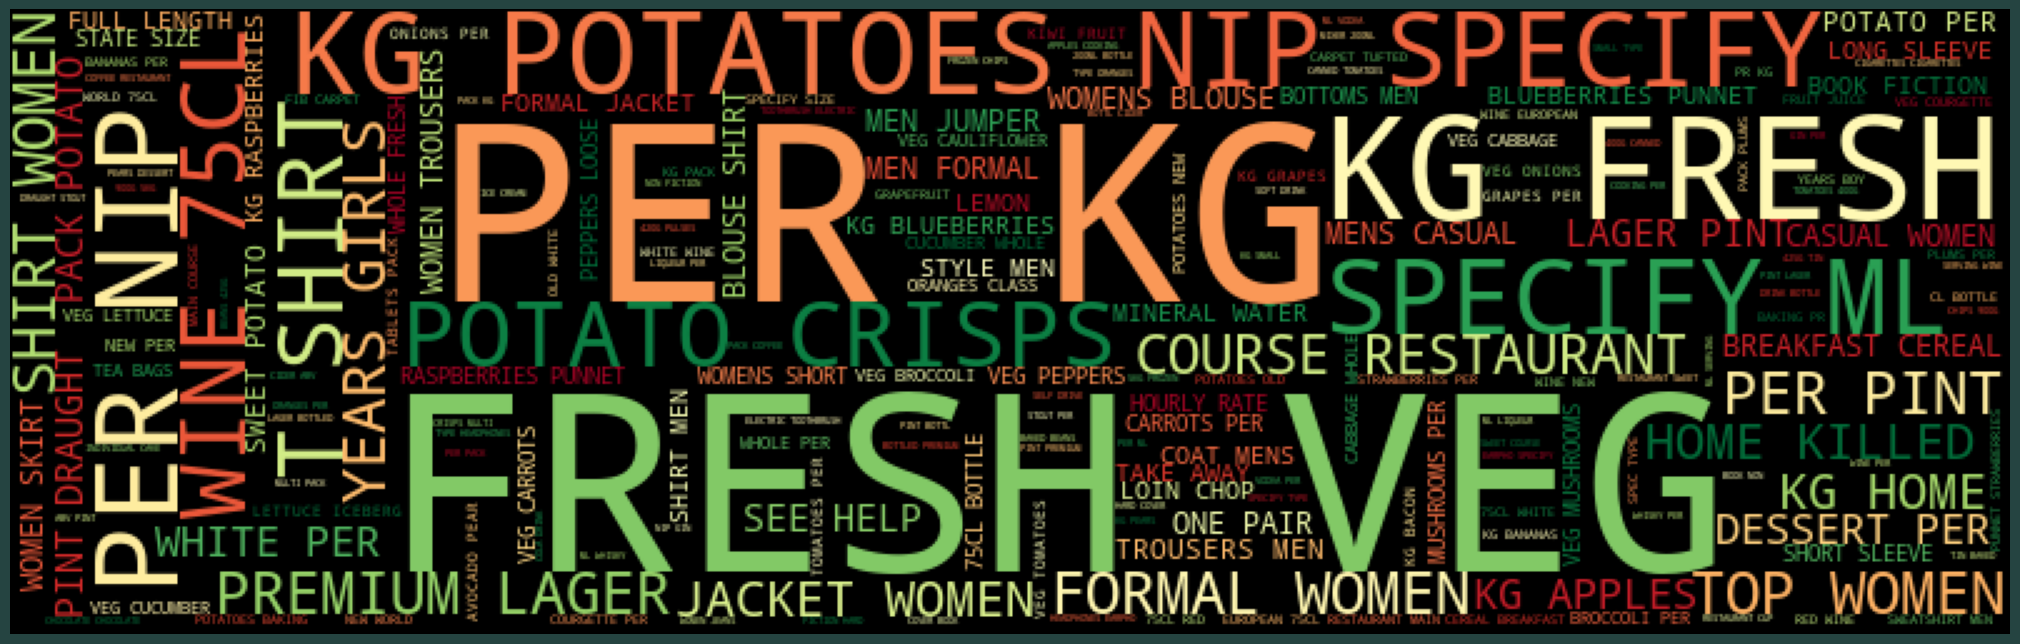

In [ ]:
text = " ".join(company_name for company_name in data["ITEM_DESC"])
wordcloud = WordCloud(width = 800, height = 250, 
            background_color ="black",colormap="RdYlGn",max_font_size=100, stopwords =None,repeat= True).generate(text)
plt.figure(figsize = (20, 8),facecolor= "#254441") 
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.tight_layout(pad = 0) 
plt.show()

Let's have a look on the ORIG_INDICATOR_BOX distribution :


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


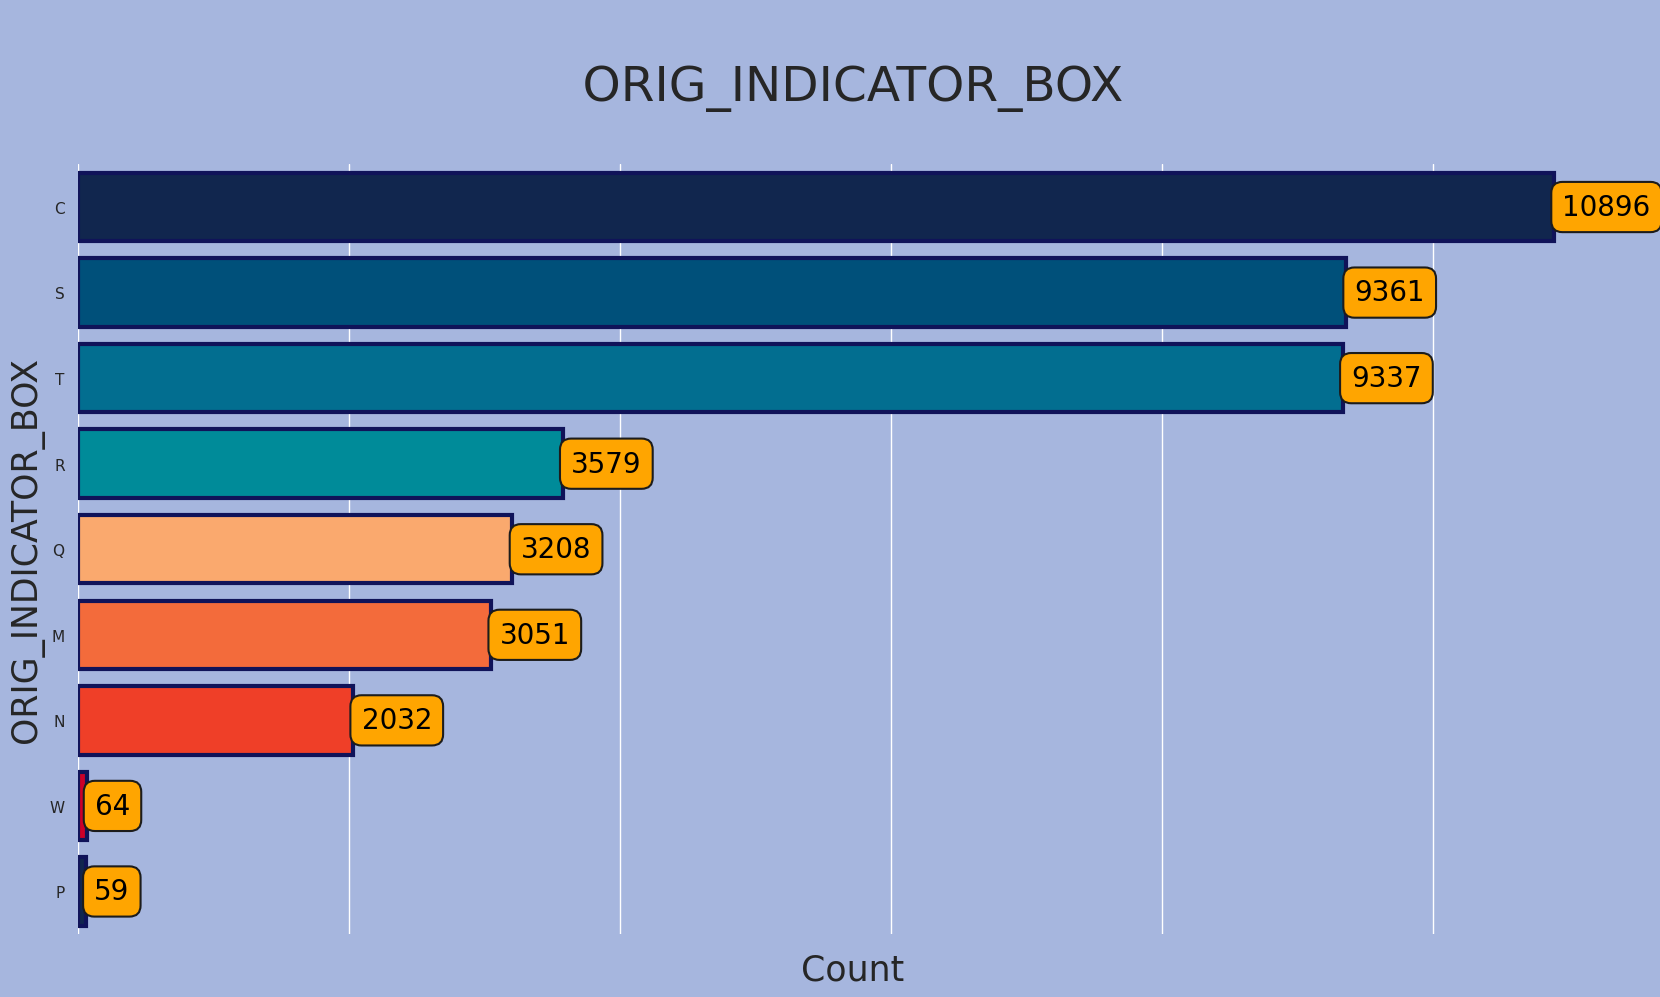

In [ ]:
ORIG_INDICATOR_BOX=data.groupby(["ORIG_INDICATOR_BOX"])["ORIG_INDICATOR_BOX"].count().sort_values(ascending = False)

print(f"Let's have a look on the ORIG_INDICATOR_BOX distribution :")
sns.set(rc={"axes.facecolor":"#A6B6DE","figure.facecolor":"#A6B6DE"})
palette = ["#11264e","#00507A","#026e90","#008b99","#faa96e","#f36b3b","#ef3f28","#CC0028"]
plt.subplots(figsize=(20, 10))
p=sns.barplot(x = ORIG_INDICATOR_BOX.values,y= ORIG_INDICATOR_BOX.index,palette=palette, saturation=1, edgecolor = "#101359", linewidth = 3)
p.axes.set_title("\n ORIG_INDICATOR_BOX \n",fontsize=35)
p.axes.set_xlabel("Count",fontsize=25)
p.axes.set_ylabel("ORIG_INDICATOR_BOX",fontsize=25)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=20,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 1.5, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the location distribution :


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


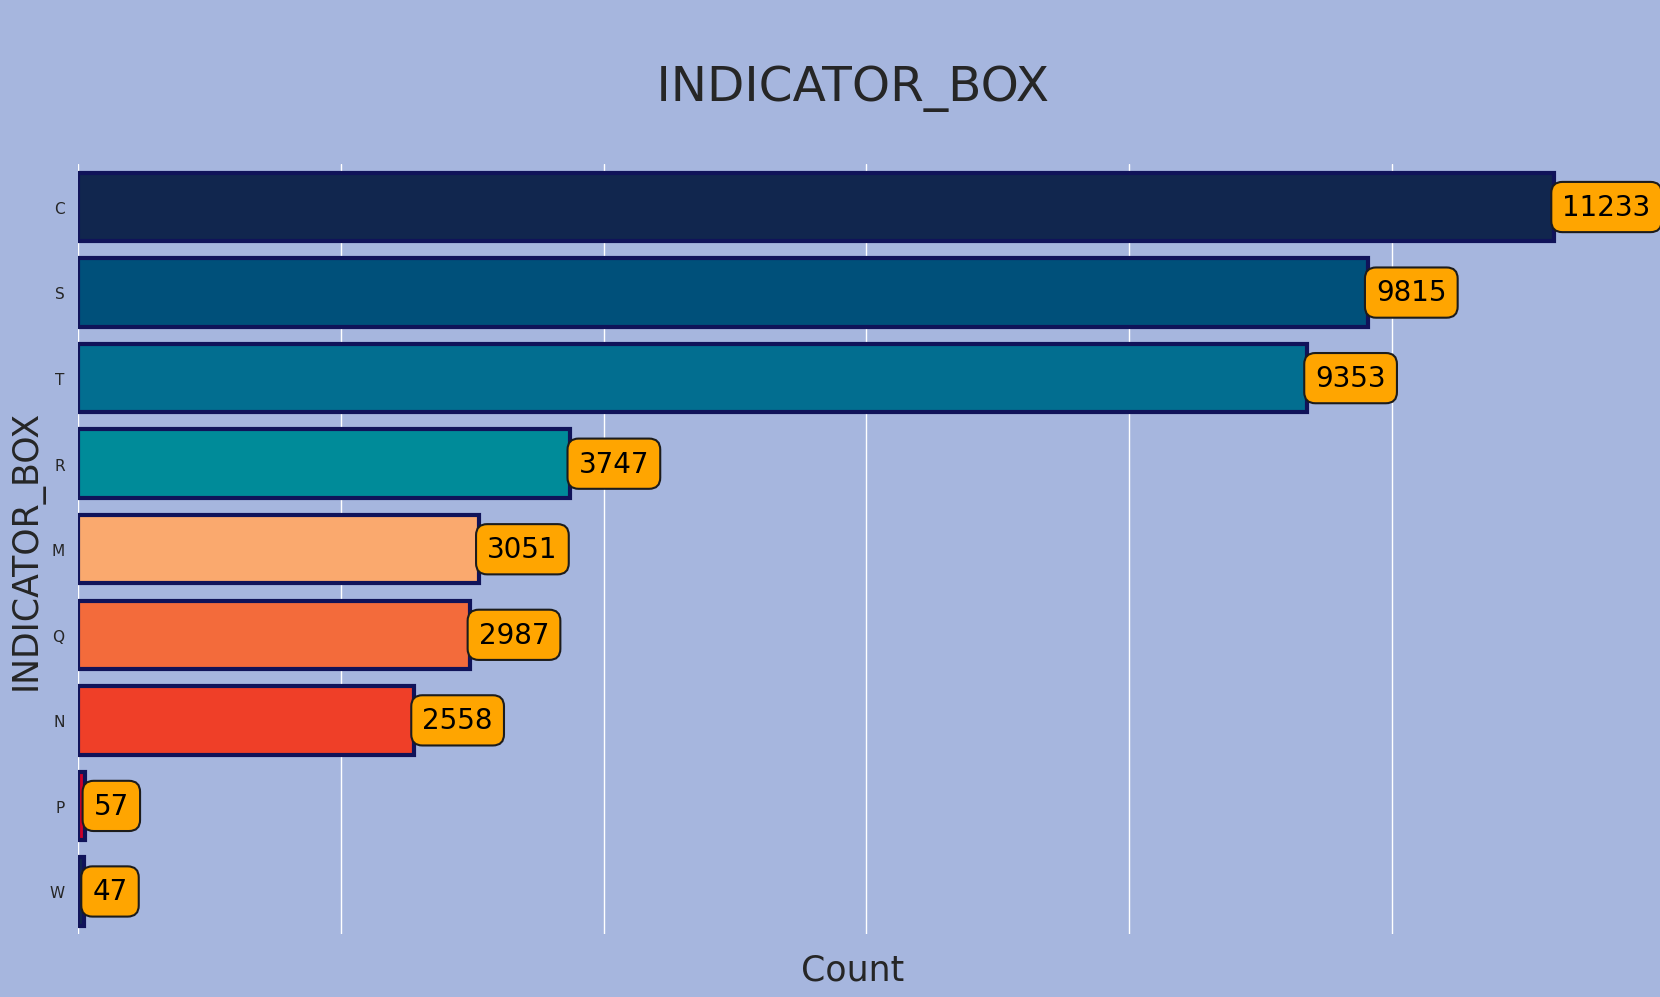

In [ ]:
INDICATOR_BOX=data.groupby(["INDICATOR_BOX"])["INDICATOR_BOX"].count().sort_values(ascending = False)

print(f"Let's have a look on the location distribution :")
sns.set(rc={"axes.facecolor":"#A6B6DE","figure.facecolor":"#A6B6DE"})
palette = ["#11264e","#00507A","#026e90","#008b99","#faa96e","#f36b3b","#ef3f28","#CC0028"]
plt.subplots(figsize=(20, 10))
p=sns.barplot(x = INDICATOR_BOX.values,y= INDICATOR_BOX.index,palette=palette, saturation=1, edgecolor = "#101359", linewidth = 3)
p.axes.set_title("\n INDICATOR_BOX \n",fontsize=35)
p.axes.set_xlabel("Count",fontsize=25)
p.axes.set_ylabel("INDICATOR_BOX",fontsize=25)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=20,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 1.5, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

Let's have a look on the REGION distribution :


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


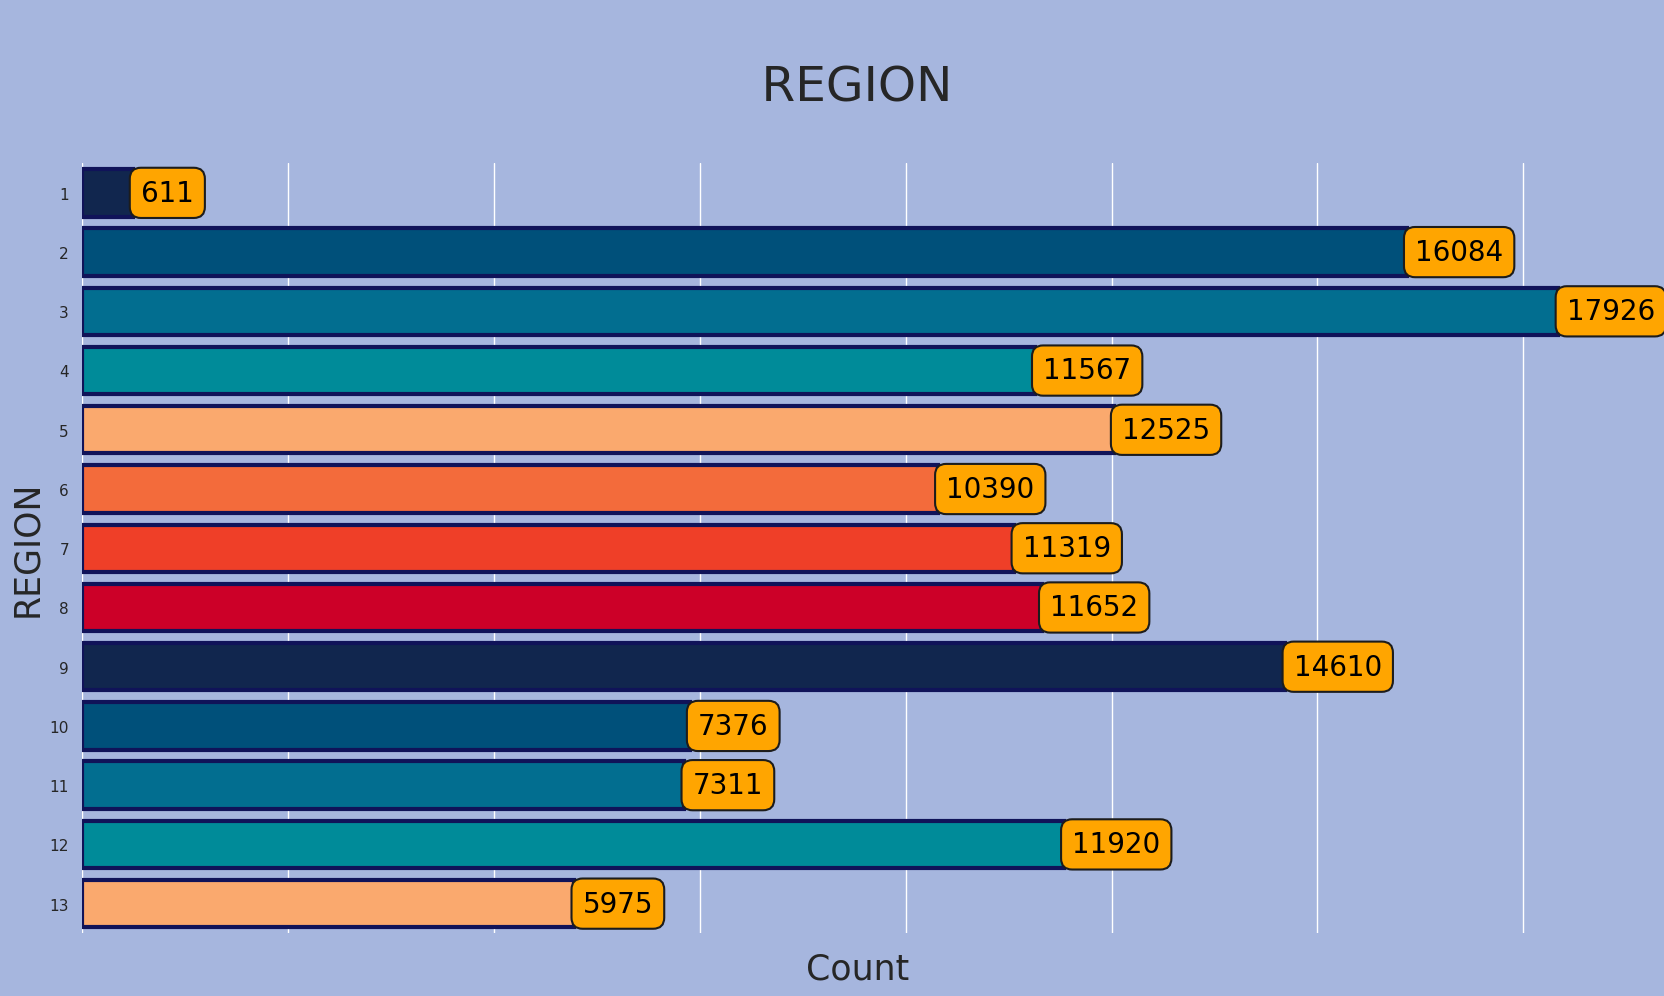

In [ ]:
REGION=data.groupby(["REGION"])["REGION"].count().sort_values()

print(f"Let's have a look on the REGION distribution :")
sns.set(rc={"axes.facecolor":"#A6B6DE","figure.facecolor":"#A6B6DE"})
palette = ["#11264e","#00507A","#026e90","#008b99","#faa96e","#f36b3b","#ef3f28","#CC0028"]
plt.subplots(figsize=(20, 10))
p=sns.barplot(x = REGION.values,y= REGION.index,palette=palette, saturation=1, edgecolor = "#101359", linewidth = 3,orient = 'h')
p.axes.set_title("\n REGION \n",fontsize=35)
p.axes.set_xlabel("Count",fontsize=25)
p.axes.set_ylabel("REGION",fontsize=25)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=20,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 1.5, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
# help(sns.barplot())

Let's have a look on the STRATUM_TYPE distribution :


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


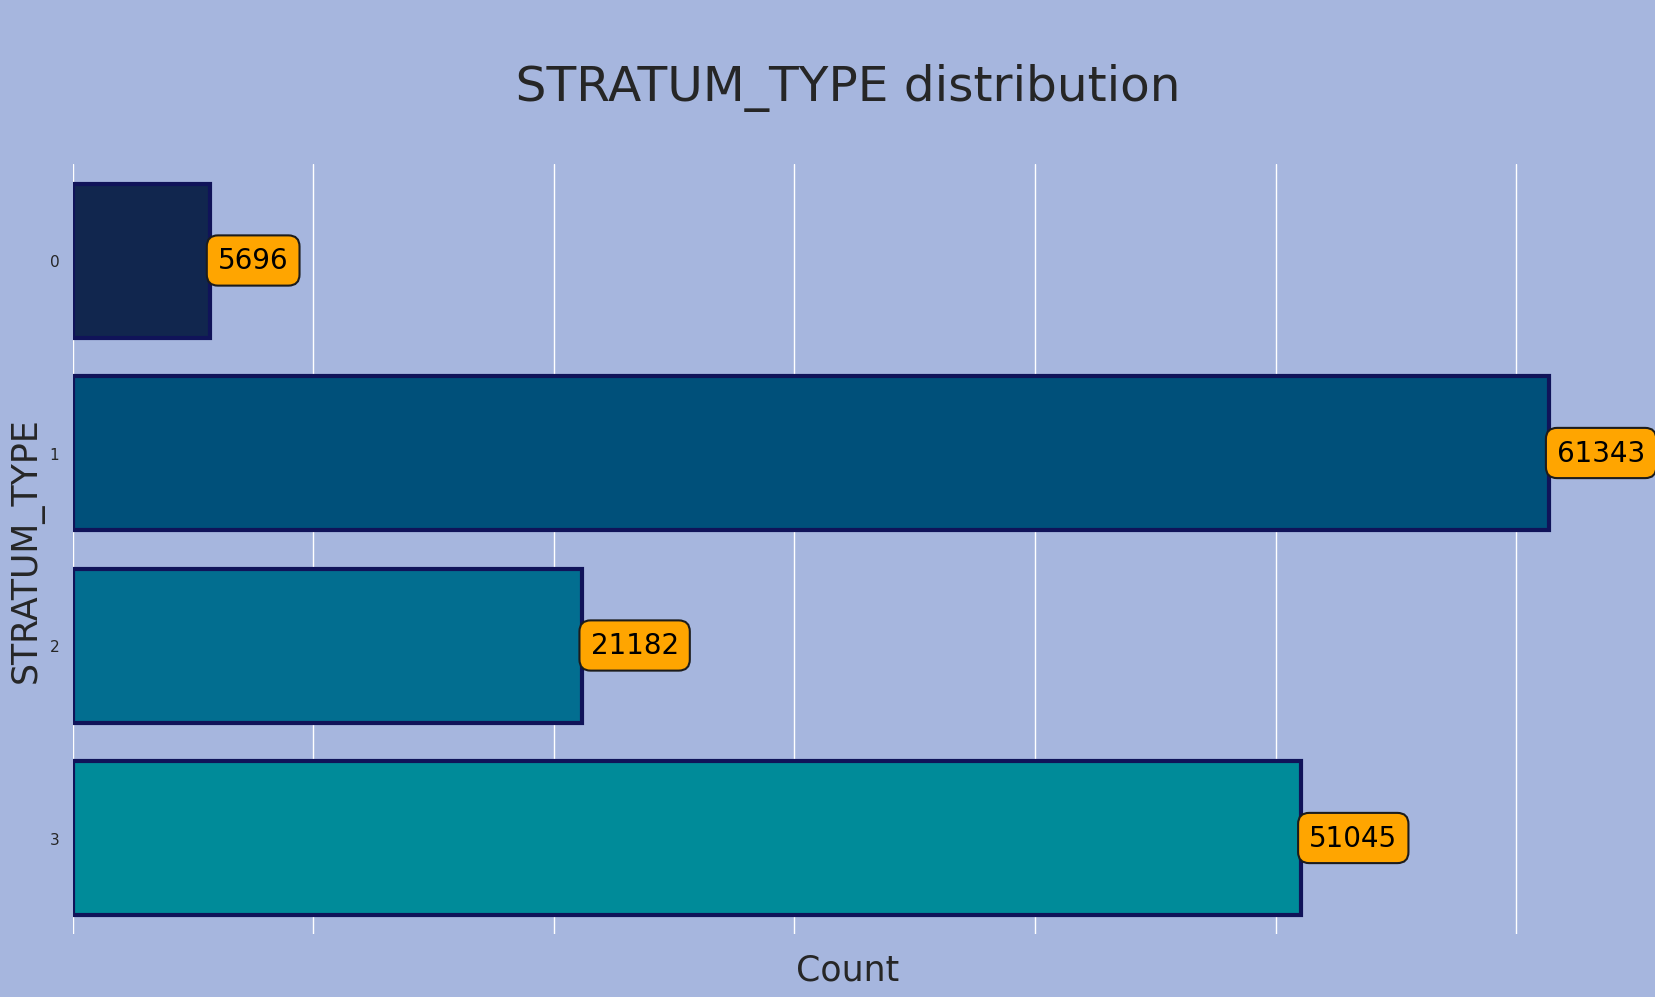

In [ ]:
STRATUM_TYPE=data.groupby(["STRATUM_TYPE"])["STRATUM_TYPE"].count().sort_values()

print(f"Let's have a look on the STRATUM_TYPE distribution :")
sns.set(rc={"axes.facecolor":"#A6B6DE","figure.facecolor":"#A6B6DE"})
palette = ["#11264e","#00507A","#026e90","#008b99","#faa96e","#f36b3b","#ef3f28","#CC0028"]
plt.subplots(figsize=(20, 10))
p=sns.barplot(x=STRATUM_TYPE.values,y=STRATUM_TYPE.index,palette=palette, saturation=1, edgecolor = "#101359", linewidth = 3,orient = 'h')
p.axes.set_title("\n STRATUM_TYPE distribution \n",fontsize=35)
p.axes.set_xlabel("Count",fontsize=25)
p.axes.set_ylabel("STRATUM_TYPE",fontsize=25)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type="edge",padding=6,size=20,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 1.5, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
for col in data.columns:
    print(f'{blu} {col}, : {mgt} {data[col].nunique()}')

 ITEM_ID, :  590
 ITEM_DESC, :  590
 VALIDITY, :  4
 SHOP_CODE, :  4197
 PRICE, :  4267
 INDICATOR_BOX, :  9
 ORIG_INDICATOR_BOX, :  9
 PRICE_RELATIVE, :  2395
 LOG_PRICE_RELATIVE, :  2250
 STRATUM_WEIGHT, :  666
 STRATUM_TYPE, :  4
 START_DATE, :  12
 END_DATE, :  1
 REGION, :  13
 SHOP_TYPE, :  4
 SHOP_WEIGHT, :  19
 BASE_PRICE, :  17313
 BASE_VALIDITY, :  4
 STRATUM_CELL, :  26


In [ ]:
low_cardinal_columns = [col for col in data.columns if(data[col].nunique()<10)]
num_col = [col for col in data.columns if(data[col].dtype in ['int','float'])]
cat_col = [col for col in data.columns if(data[col].dtype in ['object'])]

In [ ]:
def pies(col):
    print(f'{col}')
    col=data[col].value_counts().sort_values(ascending=False)
    fig = px.pie(values=col.values, 
                 names=col.index, 
                 color_discrete_sequence=px.colors.sequential.PuBu
                 ,template='plotly_dark',
                 width=750, height=500)
    fig.update_traces(textinfo='label+percent+value', textfont_size=14,
                      marker=dict(line=dict(color='#100000', width=0.2)))

    fig.data[0].marker.line.width = 2
    fig.data[0].marker.line.color='gray'
    fig.update_layout(
        font=dict(size=20,family="Franklin Gothic"))
    fig.show()

In [ ]:
for col in low_cardinal_columns:
    pies(col)

VALIDITY


INDICATOR_BOX


ORIG_INDICATOR_BOX


STRATUM_TYPE


END_DATE


SHOP_TYPE


BASE_VALIDITY


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



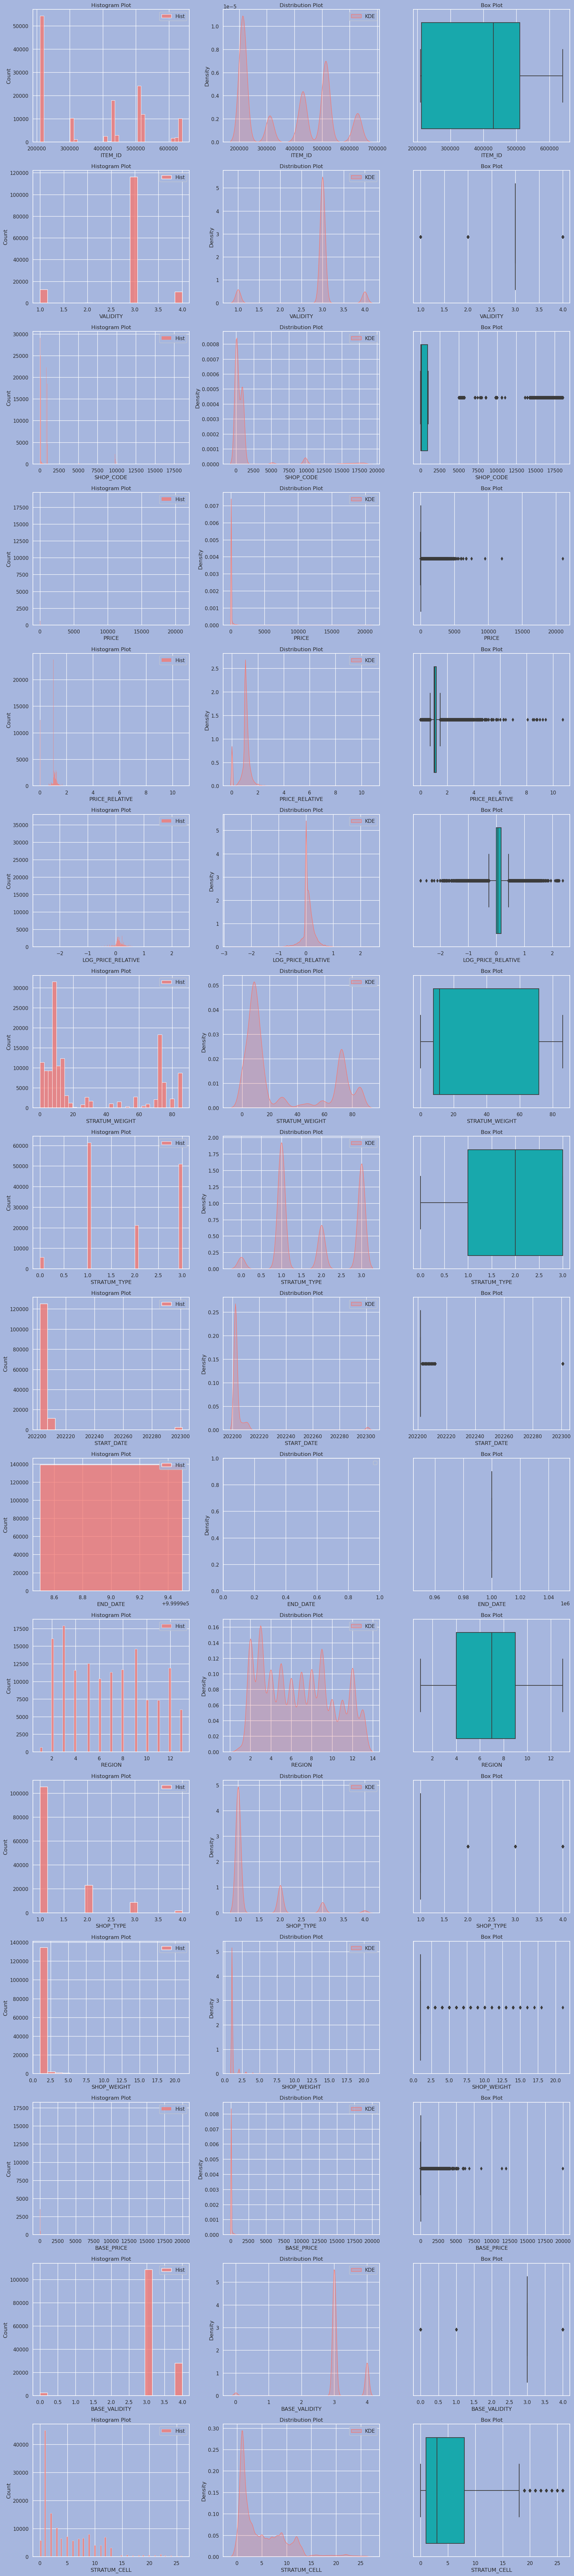

In [ ]:
ncols = 3
nrows = len(num_col)

fig, axes = plt.subplots(nrows, ncols, figsize=(18, 5*nrows))

for r in range(nrows):
    row = num_col[r]
    
    
    sns.histplot(x=data[row], ax=axes[r,0], color='#F8766D', label='Hist' , fill =True )
    
    sns.kdeplot(x=data[row], ax=axes[r,1], color='#F8766D', label='KDE' , fill =True )
    
    sns.boxplot(x=data[row], ax=axes[r,2], color='#00BFC4', orient = "h")
    
    axes[r,0].legend()
    axes[r,1].legend()
    axes[r,0].title.set_text("Histogram Plot")
    axes[r,1].title.set_text("Distribution Plot")
#     axes[r,2].title.set_text("Box Plot- Train Data")
    axes[r,2].title.set_text("Box Plot")
fig.tight_layout()
plt.show()